In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("combined_vertical.csv")
cols = ["EXTraS_Ape_v0.XMM_EP_8_FLUX", "EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR"]
num_cols = data.select_dtypes(include="number").columns
data.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])

C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\3642119816.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("combined_vertical.csv")


,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
0,411780701.000000,329.717000,-30.225400,2.5243e-11,6.0745e-14,QSO B2155-304,329.716938,-30.225588,BLL,BLLac,UV|X|V*|AGN|smm|Opt|cm|Bla|BL?|G|gam|NIR|*|QSO|MIR|BLL|Rad|Bz?,0.015800,0.019100,13.360000,13.090000,12.620000,11.398000,10.460000,10.134000,nan,nan,nan,nan,nan,63291.139241,206427.848101,195296049367088514465792.000000,12098673429095002186147827443688275968.000000,87409269821769387497756395162623279104.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,412580801.000000,82.187000,-65.448200,5.6507e-11,2.0452e-13,V* AB Dor,82.186963,-65.448666,TT*,TTauri*,UV|V*|X|PM*|Er*|Ro*|NIR|IR|*|MIR|**|TT*|Em*,67.333100,0.441400,7.856000,6.999000,6.496000,5.316000,4.845000,4.686000,nan,nan,nan,nan,nan,14.851537,48.439178,45827053559096492032.000000,1491279526343945737254163447808.000000,1135619864130781541514532639211520.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,412981701.000000,15.779800,-71.860800,4.2829e-14,1.8823e-14,2MASS J01030720-7151420,15.780000,-71.861653,RB?,RGB*_Candidate,NIR|*|MIR|RB?,1.840600,0.034200,17.960000,16.620000,nan,14.111000,13.399000,13.156000,nan,nan,nan,nan,nan,543.301097,1772.009127,1676452015647071666176.000000,1512624261784524216498267357184.000000,371240176102921007195071577063424.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,412981701.000000,15.409200,-71.903600,2.7227e-14,1.4413e-14,UCAC4 091-002858,15.407673,-71.904531,*,Star,X|NIR|*,11.182700,0.198700,13.060000,11.880000,11.700000,9.890000,9.320000,9.180000,nan,nan,nan,nan,nan,89.423842,291.661227,275933144947105792000.000000,26050675585787850811217281024.000000,487392048283855364600038537822208.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

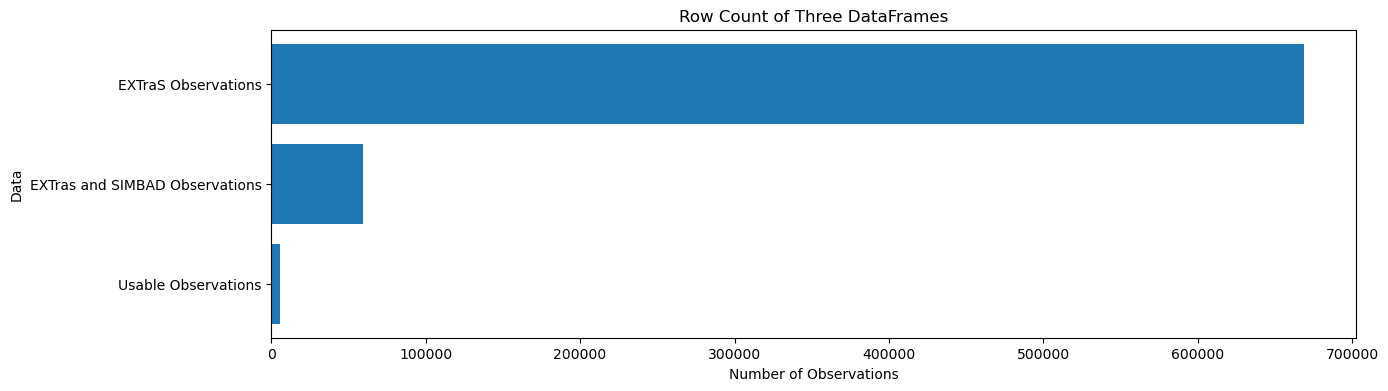

In [3]:
bigData=pd.read_csv("headedBigData.csv")
crossData=pd.read_csv("quarterCrossHeadedBigData.csv")
count_df3 = len(bigData)
count_df2 = len(crossData)
count_df1 = len(data)
counts = [count_df1, count_df2, count_df3]
labels = ['Usable Observations', 'EXTras and SIMBAD Observations', 'EXTraS Observations']

plt.figure(figsize=(14,4))
plt.barh(labels, counts)
plt.xlabel('Number of Observations')
plt.ylabel('Data')
plt.title('Row Count of Three DataFrames')
plt.show()

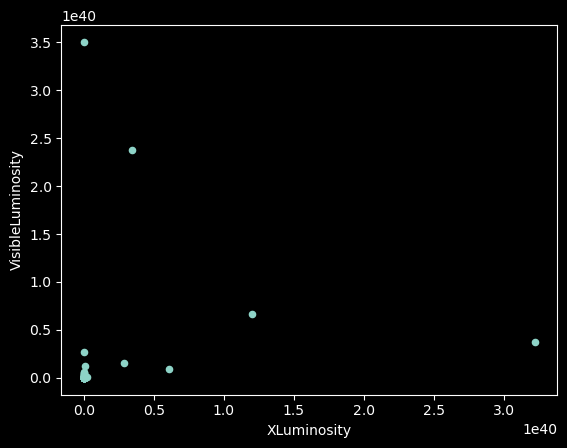

In [4]:
x='XLuminosity'
y='VisibleLuminosity'
plt.style.use('dark_background') 
data.plot.scatter(x,y)
plt.show() #Questo plot non ci dice niente, proviamo a guardare la scala logaritmica

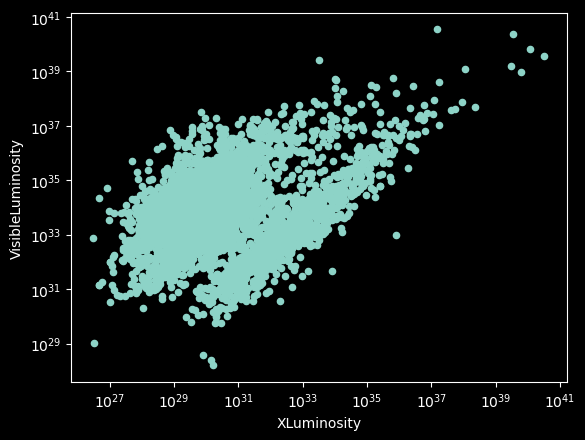

In [5]:

data.plot.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.show()
#mentre è più interessante, uno scatterplot default è abbastanza inutilizzabile

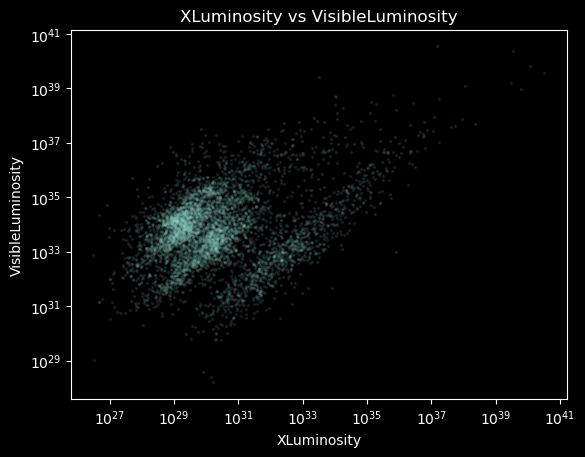

In [6]:
data.plot.scatter(x,y, s=2, alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()
#un paio di grafici coi punti ridotti di dimensione e semitrasparenti

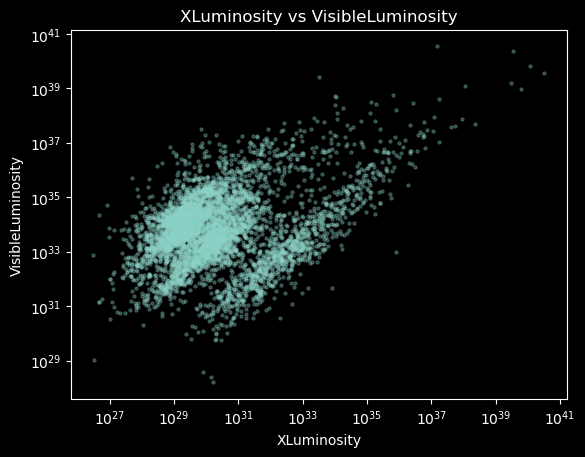

In [7]:

data.plot.scatter(x,y, s=5, alpha=0.3)
plt.xscale("log")   
plt.yscale("log")   
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()

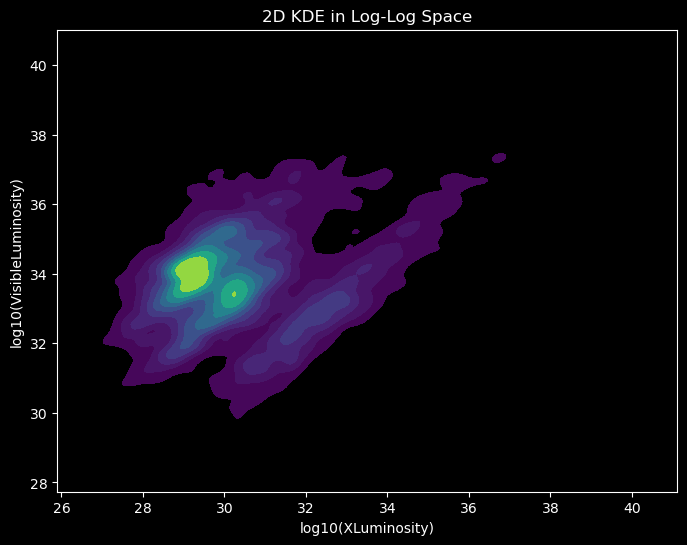

In [8]:
import seaborn as sns
# Remove non-positive values for log scale
x = data["XLuminosity"].values
y = data["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Take log10 of the data
log_x = np.log10(x)
log_y = np.log10(y)

# KDE plot in log-log space
plt.figure(figsize=(8,6))
sns.kdeplot(x=log_x, y=log_y, fill=True, cmap='viridis', bw_adjust=0.5)

plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(VisibleLuminosity)")
plt.title("2D KDE in Log-Log Space")
plt.show()
#heatmap che mostra più chiaramente i due hotspot nella distribuzione delle stelle

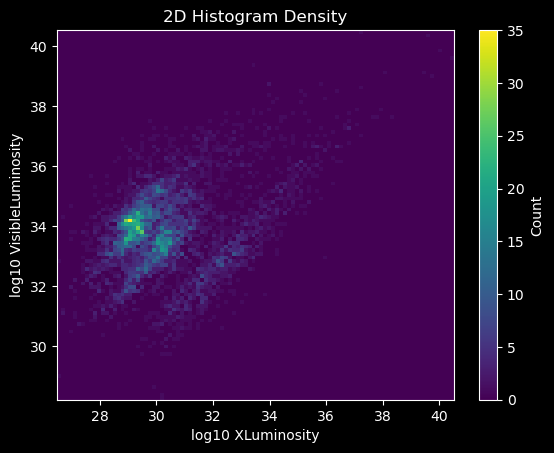

In [9]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

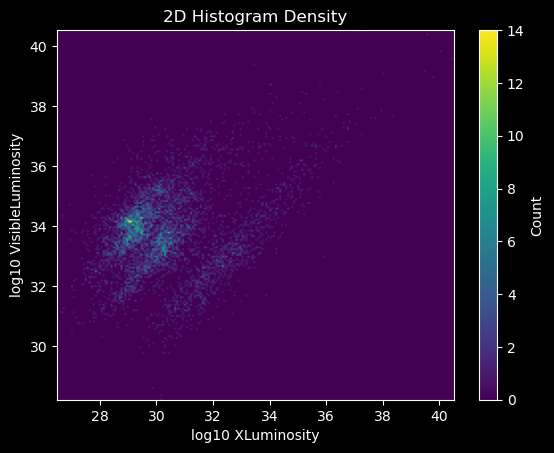

In [10]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=200)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

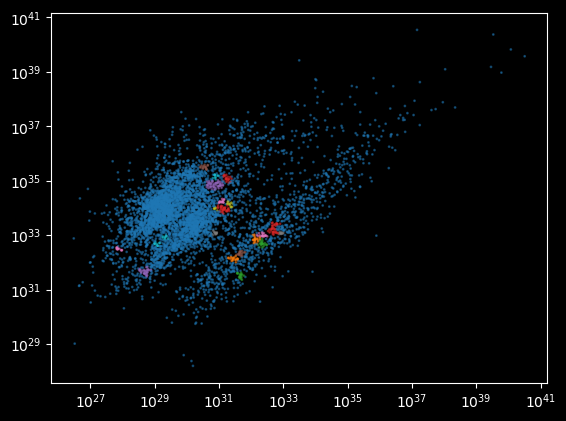

In [11]:
from sklearn.cluster import DBSCAN

X = np.column_stack([np.log10(x), np.log10(y)])
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
labels = db.labels_

plt.scatter(x, y, c=labels, cmap='tab10', s=1, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()
#not really useful

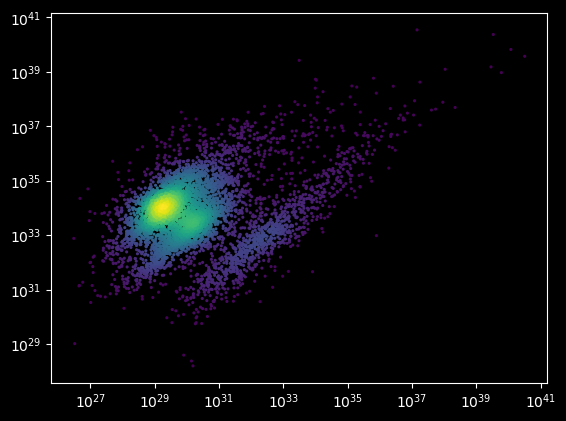

In [12]:
from scipy.stats import gaussian_kde
xy = np.vstack([np.log10(x), np.log10(y)])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=5, edgecolor='none')
plt.xscale('log')
plt.yscale('log')
plt.show()

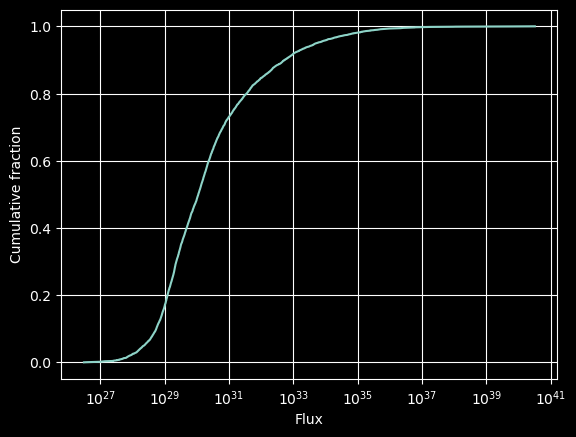

In [13]:

column = "XLuminosity"   
datas = data[column].dropna()            

sorted_data = np.sort(datas)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.plot(sorted_data, cdf)
plt.xscale('log')
plt.xlabel('Flux')
plt.ylabel('Cumulative fraction')
plt.grid(True)
plt.show()

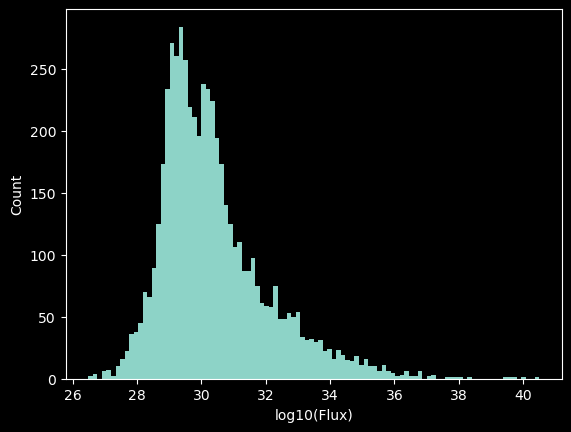

In [14]:
logF = np.log10(datas)
plt.hist(logF, bins=100)
plt.xlabel('log10(Flux)')
plt.ylabel('Count')
plt.show()

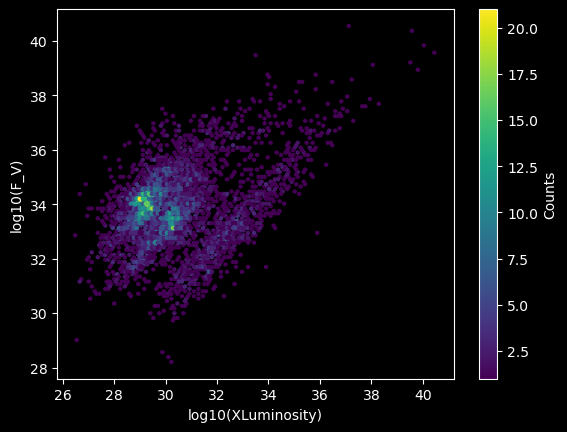

In [15]:

x = data["XLuminosity"].to_numpy()
y = data["VisibleLuminosity"].to_numpy()

# Filter non-positive values (log cannot take <=0)
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Log transform
logx = np.log10(x)
logy = np.log10(y)

plt.hexbin(logx, logy, gridsize=120, mincnt=1)
plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(F_V)")
plt.colorbar(label="Counts")
plt.show()

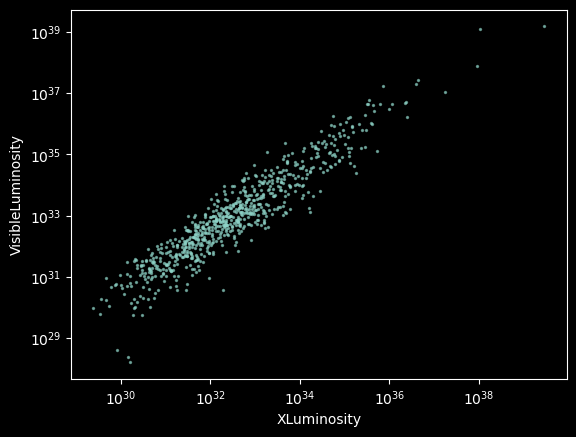

In [16]:
datatype=data[data["main_type"]=="QSO"]
x='XLuminosity'
y='VisibleLuminosity'
datatype.plot.scatter(x,y,  s=2, alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.show()

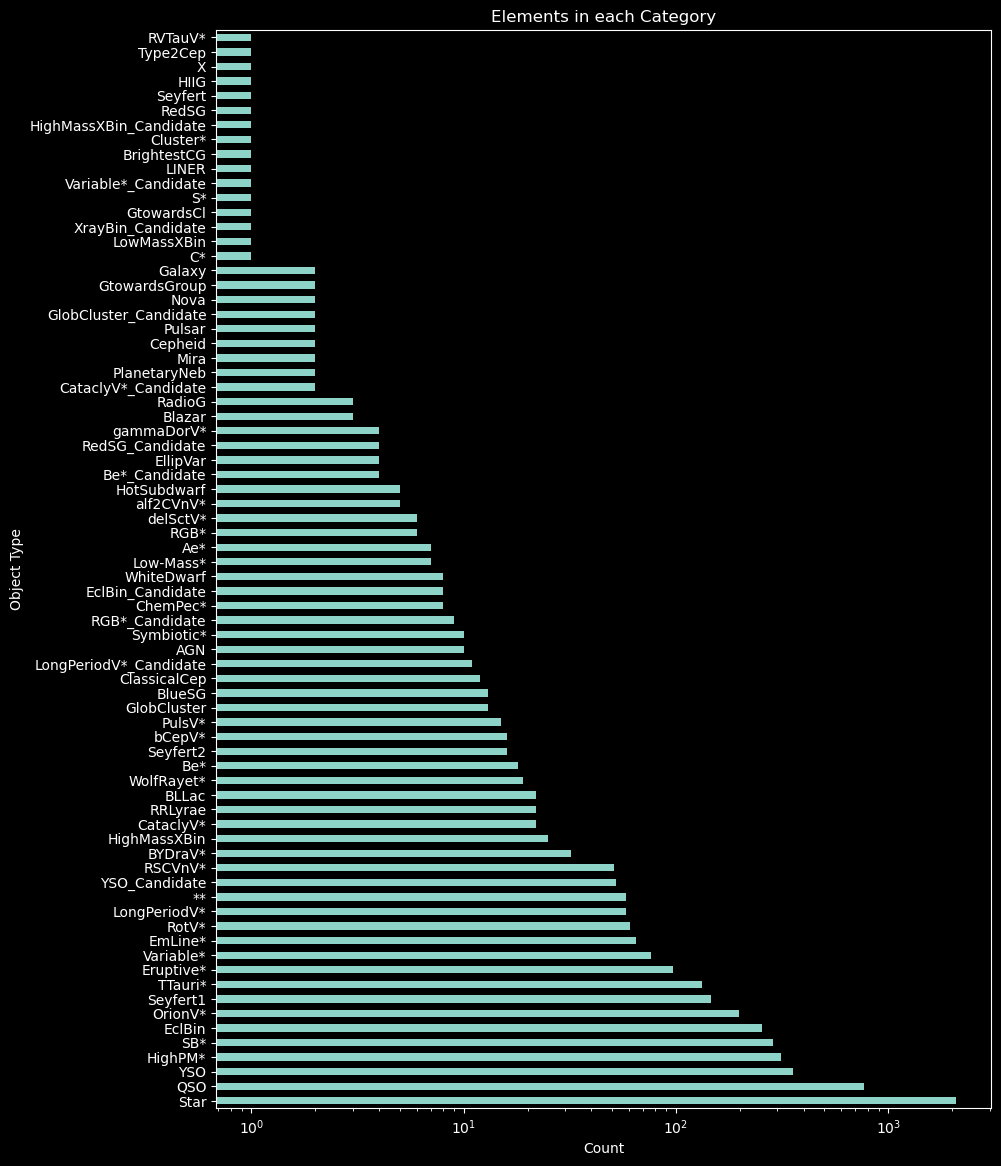

In [17]:
freq=data['main_type'].value_counts()


plt.figure(figsize=(10,14))
freq.plot(kind='barh')

plt.ylabel("Object Type")
plt.xlabel("Count")
plt.xscale("log")
plt.title("Elements in each Category")

plt.show()

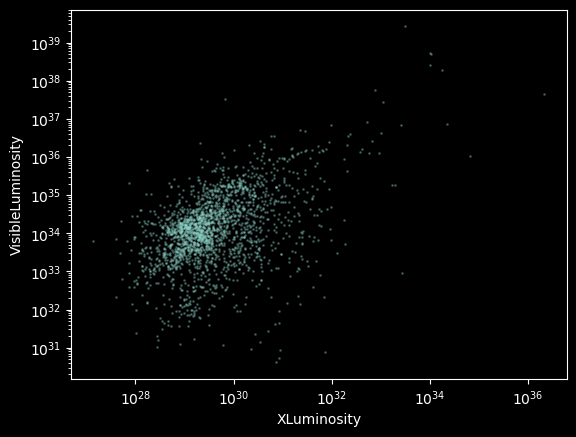

In [18]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y,  s=1, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()

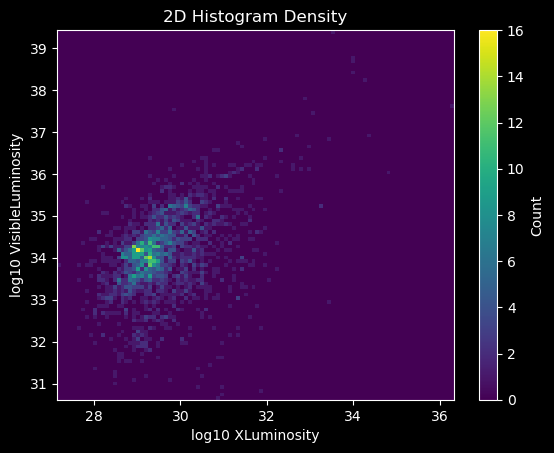

In [19]:
x = datatype["XLuminosity"].values
y = datatype["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

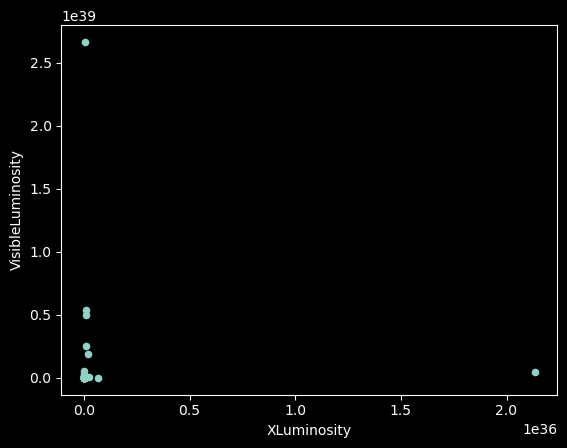

In [20]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y)

plt.show()

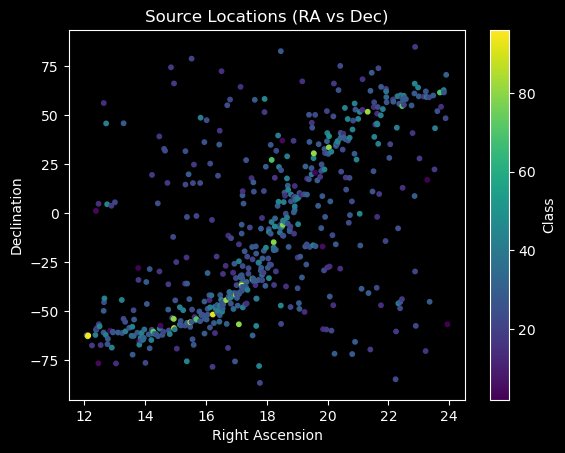

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('lrs_cleaned.csv')

# scatter plot che rappresenta la posizione di tutte le 531 sorgenti luminose sulla sfera celeste, utilizzando le coordinate astronomiche standard
plt.scatter(df['ra'], df['dec'], c=df['class'], cmap='viridis', s=10)
plt.title('Source Locations (RA vs Dec)')
plt.xlabel('Right Ascension') # indica la "longitudine" celeste
plt.ylabel('Declination') # indica la "latitudine" celeste
plt.colorbar(label='Class')
plt.show()



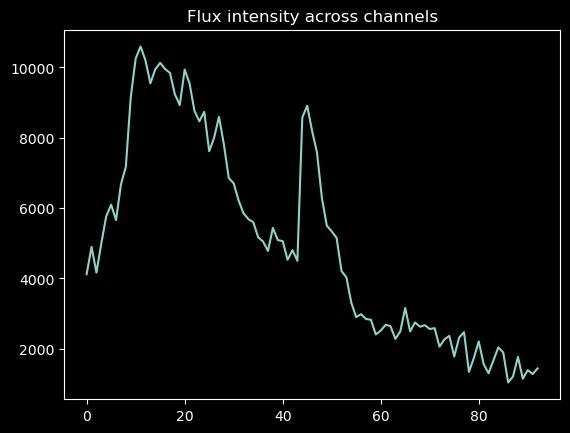

In [22]:
# grafico a linee che rappresenta lo spettro infrarosso di una singola sorgente del database.
# (la visualizzazione diretta di come l'energia emessa dalla stella si distribuisce attraverso le diverse frequenze della luce)

# asse orizzontale rappresenta i "canali" del sensore
# asse verticale indica l'intensità del flusso
flux_data = df.filter(like='flux_').iloc[0] 
plt.plot(flux_data.values)
plt.title('Flux intensity across channels')
plt.show()

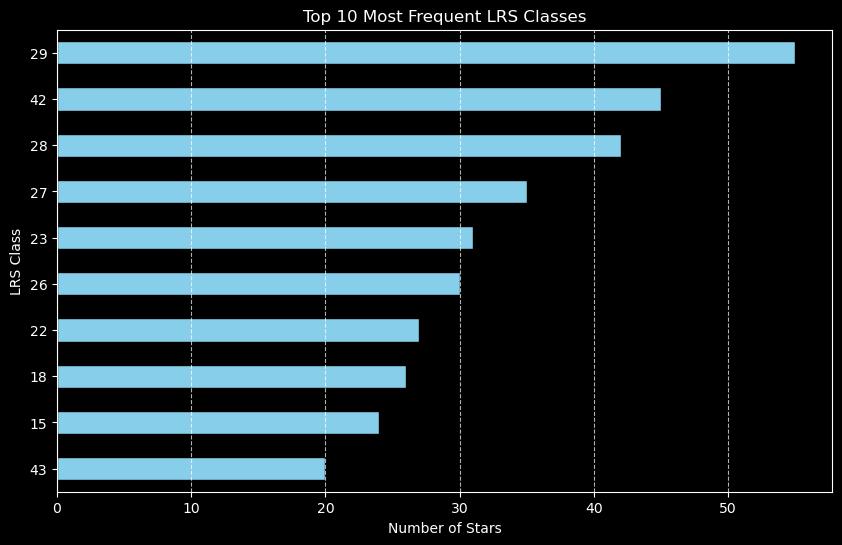

In [23]:
# grafico a barre orizzontali che illustra la distribuzione delle dieci classi spettrali più comuni all'interno del campione di 531 stelle analizzate
top_classes = df['class'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_classes.plot(kind='barh', color='skyblue', edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Top 10 Most Frequent LRS Classes')
plt.xlabel('Number of Stars') # numero di stelle appartenenti a ciascuna classe
plt.ylabel('LRS Class') # elenca i codici identificativi delle classi LRS (Low Resolution Spectrometer)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

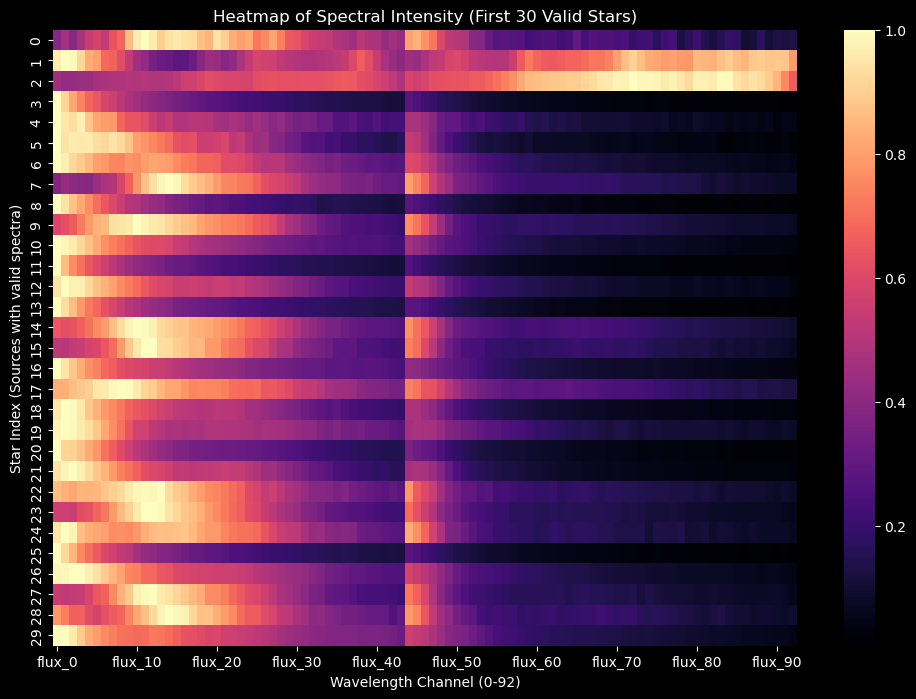

In [24]:
# heatmap che fornisce una visualizzazione d'insieme delle "impronte digitali" spettrali per le prime 30 stelle del dataset. 
# per identificare visivamente pattern comuni o anomalie tra diversi oggetti celesti contemporaneamente.
# Cerchiamo le righe dove flux_0 non è nullo
df_valid = df.dropna(subset=['flux_0'])

heatmap_data = df_valid.filter(like='flux_').head(30)
# dividiamo ogni riga per il suo massimo per vedere i pattern indipendentemente dalla luminosità
heatmap_norm = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_norm, cmap='magma', xticklabels=10) #usiamo heatmap_norm per vedere i dettagli delle righe di assorbimento/emissione
plt.title('Heatmap of Spectral Intensity (First 30 Valid Stars)')
plt.xlabel('Wavelength Channel (0-92)')
plt.ylabel('Star Index (Sources with valid spectra)')
plt.show()

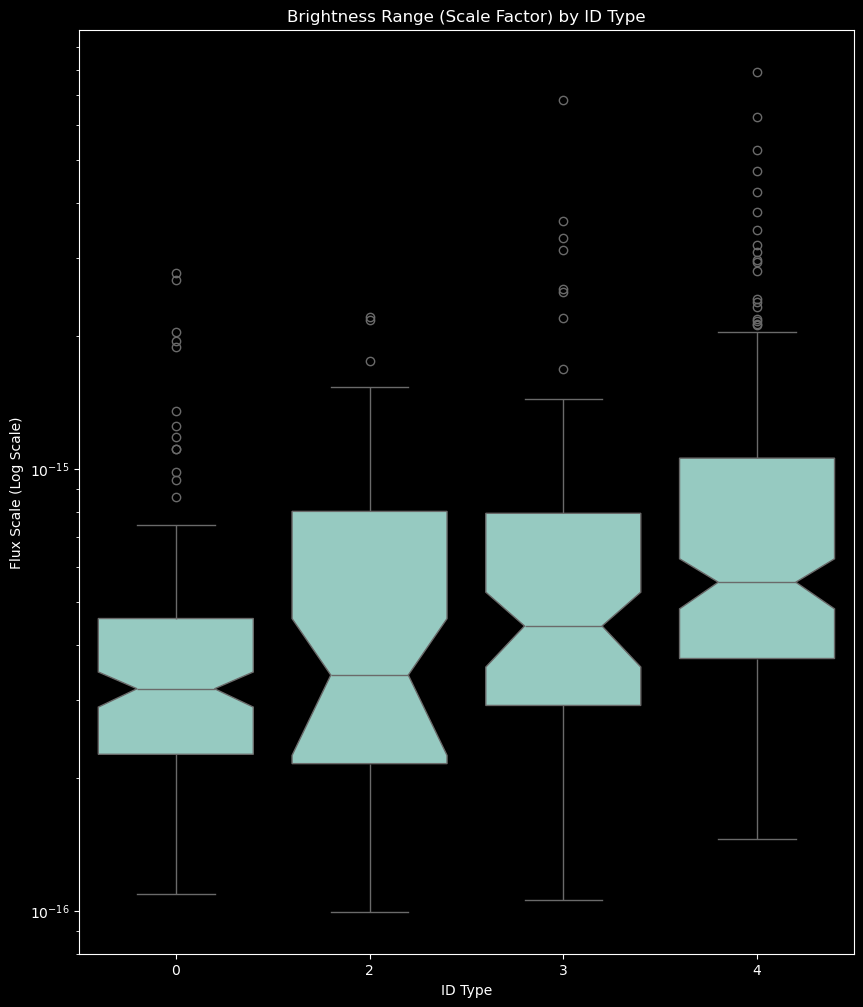

In [25]:
# boxplot che rappresenta la distribuzione del "fattore di scala" (l'intensità o la luminosità delle sorgenti luminose)
# suddivisa per le diverse categorie di ID Type del dataset

# il grafico permette di confrontare rapidamente quali ID Type presentano una luminosità più costante e quali invece mostrano una variabilità maggiore
df_filtered = df[df['scale'] != df['scale'].max()]
plt.figure(figsize=(10, 12))
# usiamo scala logaritmica
sns.boxplot(x='id_type', y='scale', data=df_filtered, notch=True, showfliers=True)
plt.yscale('log')
plt.title('Brightness Range (Scale Factor) by ID Type')
plt.xlabel('ID Type')
plt.ylabel('Flux Scale (Log Scale)')
plt.show()

In [26]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(10).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
4646,770180201.000000,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
962,690742401.000000,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
996,690740601.000000,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4891,763820101.000000,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [27]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
4646,770180201.000000,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
962,690742401.000000,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
996,690740601.000000,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4891,763820101.000000,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

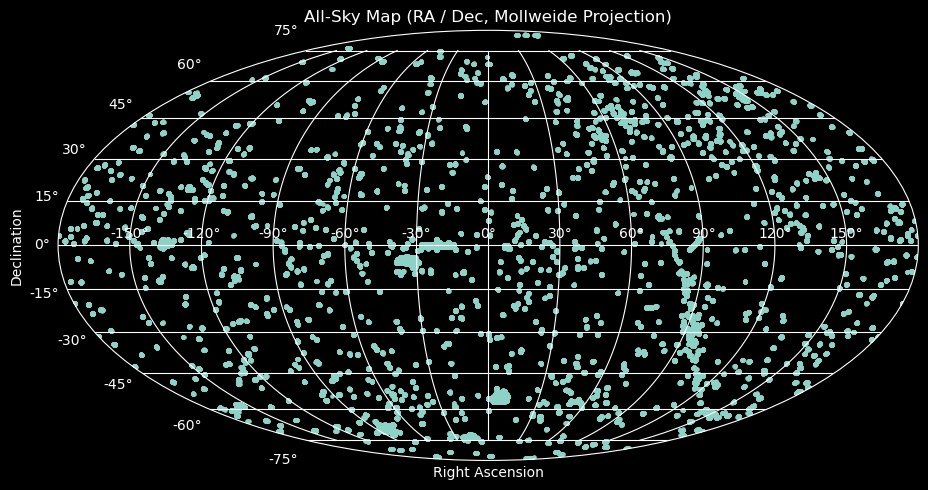

In [28]:

df = pd.read_csv("headedBigData.csv")  

ra = df["EXTraS_Ape_v0.XMM_RA"].values
dec = df["EXTraS_Ape_v0.XMM_DEC"].values

# Convert to radians for Mollweide projection
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)

# Wrap RA at 180° and reverse direction (astronomy convention)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

# Plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

ax.scatter(ra_rad, dec_rad, s=4, alpha=0.6)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("All-Sky Map (RA / Dec, Mollweide Projection)")
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\139598111.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


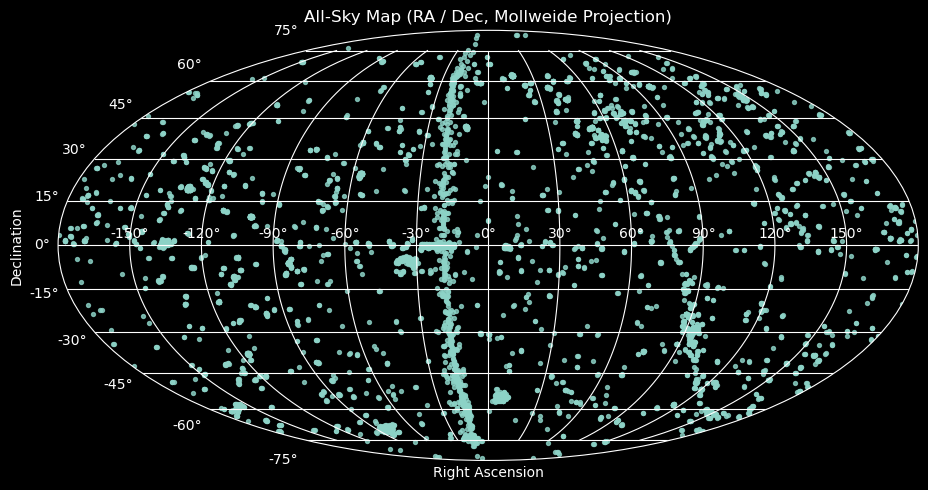

In [29]:
df = pd.read_csv("combined_vertical.csv")  

ra = df["ra"].values
dec = df["dec"].values

# Convert to radians for Mollweide projection
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)

# Wrap RA at 180° and reverse direction (astronomy convention)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

# Plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

ax.scatter(ra_rad, dec_rad, s=8, alpha=0.8)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("All-Sky Map (RA / Dec, Mollweide Projection)")
ax.grid(True)

plt.tight_layout()
plt.show()

In [44]:

df = pd.read_csv("combined_vertical.csv")
base = ["XLuminosity", "VisibleLuminosity"]
zcol = df["EXTraS_Ape_v0.XMM_EP_8_FLUX"].dropna()
xcol =df["XLuminosity"].dropna()
ycol=df["VisibleLuminosity"].dropna()
cols =[zcol, xcol, ycol]
if len(cols) < 2:
    raise ValueError("Servono almeno 2 colonne numeriche valide per il pairplot.")

df = prep_log_df(data, cols)
log_cols = ["log10_"+c for c in cols]

g = sns.pairplot(
    df[log_cols],
    kind="kde",        
    diag_kind="hist",
    plot_kws={"fill": True, "levels": 8},
    diag_kws={"bins": 40}
)
g.fig.suptitle("Pairwise density (KDE) + histograms in log-space", y=1.02)
plt.show()



C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\842241549.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


NameError: name 'prep_log_df' is not defined

C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\72923869.py:6: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


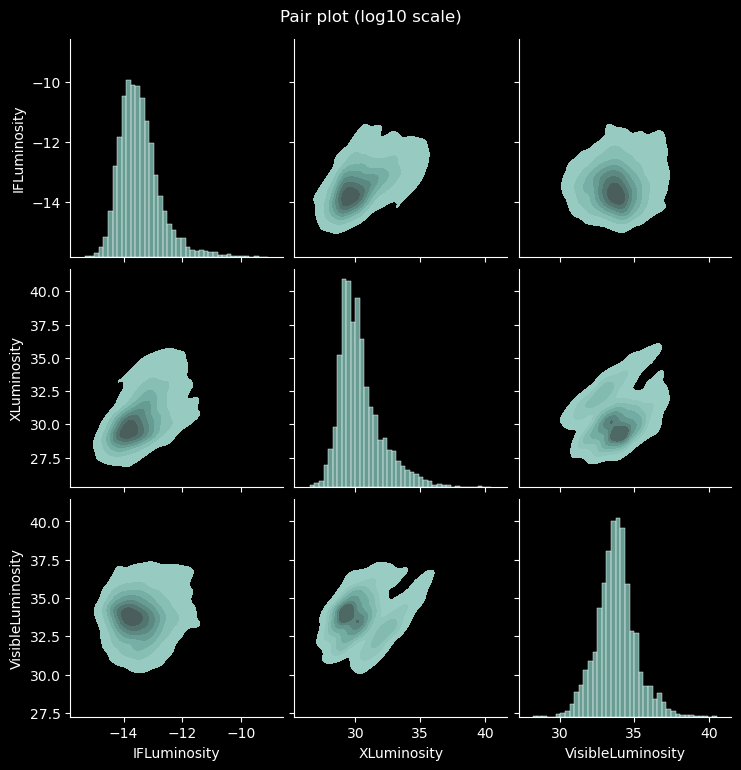

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("combined_vertical.csv")

cols = [
    "EXTraS_Ape_v0.XMM_EP_8_FLUX",
    "XLuminosity",
    "VisibleLuminosity"
]

# Seleziona colonne, rimuovi NaN e valori <= 0 (necessari per il log)
df_sel = df[cols].dropna()
df_sel.rename(columns={"EXTraS_Ape_v0.XMM_EP_8_FLUX": "IFLuminosity"}, inplace=True)
df_sel = df_sel[(df_sel > 0).all(axis=1)]

# Log10
df_log = np.log10(df_sel)

# Pair plot
sns.pairplot(
    df_log,
    kind="kde",        
    diag_kind="hist",
    plot_kws={"fill": True, "levels": 8},
    diag_kws={"bins": 40}
)

plt.suptitle("Pair plot (log10 scale)", y=1.02)
plt.show()


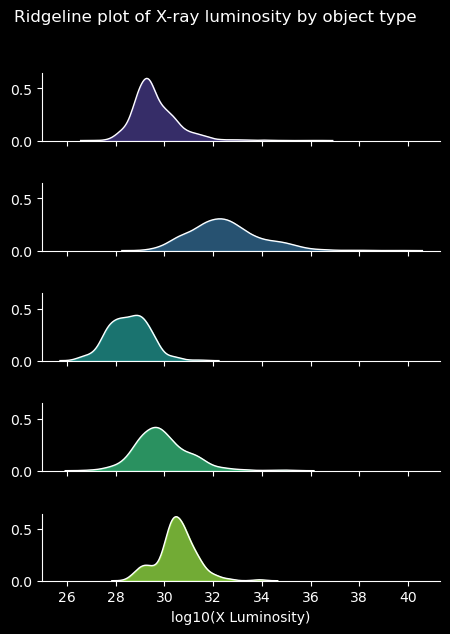

In [31]:

df = data[["main_type", "XLuminosity"]].dropna()
df = df[df["XLuminosity"] > 0]
df["logXL"] = np.log10(df["XLuminosity"])

top = df["main_type"].value_counts().head(5).index
df = df[df["main_type"].isin(top)]

g = sns.FacetGrid(
    df,
    row="main_type",
    hue="main_type",
    aspect=4,
    height=1.2,
    palette="viridis"
)

g.map(sns.kdeplot, "logXL", fill=True, alpha=0.8)
g.map(sns.kdeplot, "logXL", color="white", lw=1)
g.set_titles("")
g.set_xlabels("log10(X Luminosity)")
g.set_ylabels("")
g.fig.suptitle("Ridgeline plot of X-ray luminosity by object type", y=1.05)
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\2711964830.py:6: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


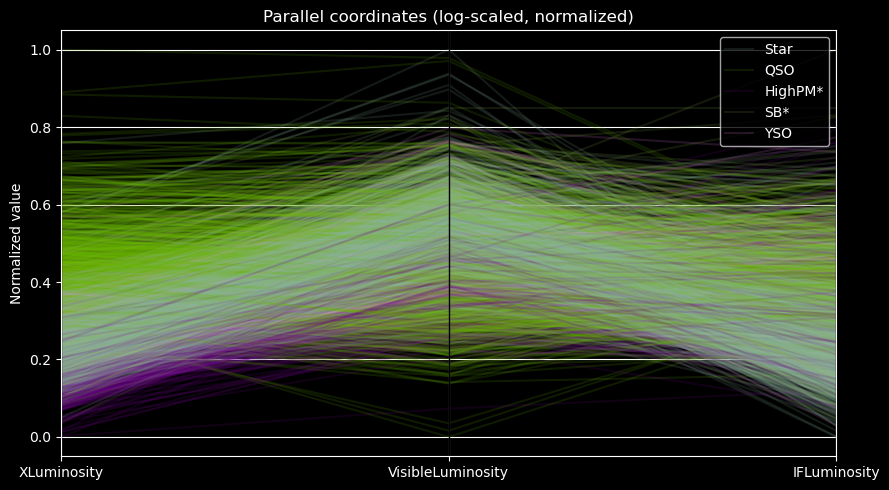

In [61]:
from pandas.plotting import parallel_coordinates

plt.style.use("dark_background")

cat = "main_type"
df = pd.read_csv("combined_vertical.csv")

cols = [
    "IFLuminosity",
    "XLuminosity",
    "VisibleLuminosity"
]

plt.style.use("dark_background")

cat = "main_type"

features = [
    "XLuminosity",
    "VisibleLuminosity",
    "IFLuminosity"
]

cols = [c for c in [cat] + features if c in data.columns]
df = data[cols].dropna()

top = df[cat].value_counts().head(5).index
df = df[df[cat].isin(top)]

for c in features:
    if c in df.columns:
        df = df[df[c] > 0]
        df[c] = np.log10(df[c])

df_norm = df.copy()
for c in features:
    if c in df_norm.columns:
        m, M = df_norm[c].min(), df_norm[c].max()
        df_norm[c] = (df_norm[c] - m) / (M - m + 1e-12)

plt.figure(figsize=(9,5))
parallel_coordinates(df_norm[[cat] + features], class_column=cat, alpha=0.15)
plt.title("Parallel coordinates (log-scaled, normalized)")
plt.ylabel("Normalized value")
plt.tight_layout()
plt.show()



C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\779760055.py:6: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


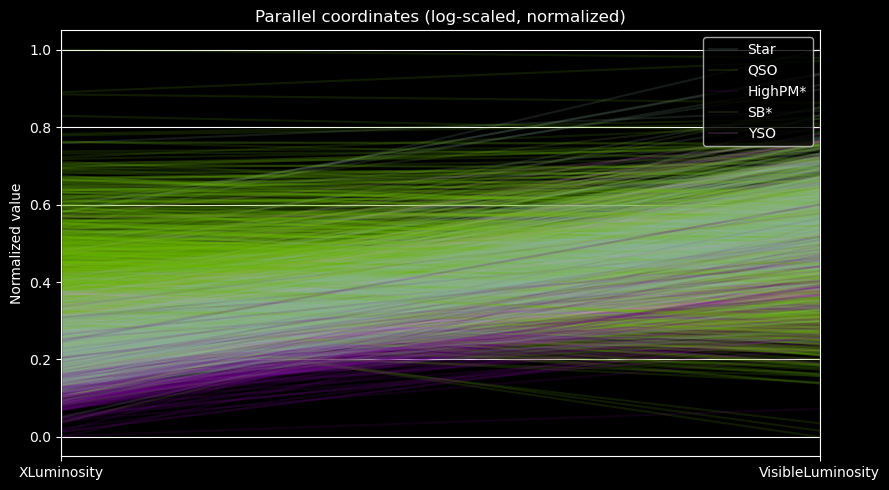

In [64]:
from pandas.plotting import parallel_coordinates

plt.style.use("dark_background")

cat = "main_type"
df = pd.read_csv("combined_vertical.csv")

cols = [
    "IFLuminosity",
    "XLuminosity",
   # "VisibleLuminosity"
]

plt.style.use("dark_background")

cat = "main_type"

features = [
    "XLuminosity",
    "VisibleLuminosity",
  #  "IFLuminosity"
]

cols = [c for c in [cat] + features if c in data.columns]
df = data[cols].dropna()

top = df[cat].value_counts().head(5).index
df = df[df[cat].isin(top)]

for c in features:
    if c in df.columns:
        df = df[df[c] > 0]
        df[c] = np.log10(df[c])

df_norm = df.copy()
for c in features:
    if c in df_norm.columns:
        m, M = df_norm[c].min(), df_norm[c].max()
        df_norm[c] = (df_norm[c] - m) / (M - m + 1e-12)

plt.figure(figsize=(9,5))
parallel_coordinates(df_norm[[cat] + features], class_column=cat, alpha=0.15)
plt.title("Parallel coordinates (log-scaled, normalized)")
plt.ylabel("Normalized value")
plt.tight_layout()
plt.show()

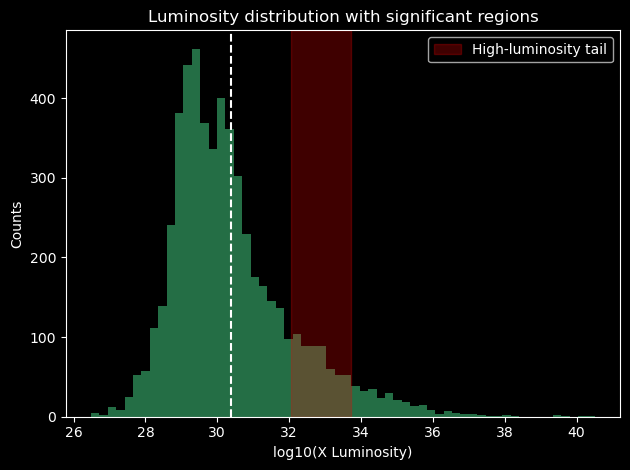

In [33]:
x = data["XLuminosity"]
x = x[x > 0]
logx = np.log10(x)

counts, bins, _ = plt.hist(logx, bins=60, color="seagreen", alpha=0.8)
mean = logx.mean()
std = logx.std()

plt.axvspan(mean+1*std, mean+2*std, color="red", alpha=0.25, label="High-luminosity tail")
plt.axvline(mean, linestyle="--", color="white")

plt.xlabel("log10(X Luminosity)")
plt.ylabel("Counts")
plt.title("Luminosity distribution with significant regions")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_8732\275145031.py:6: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


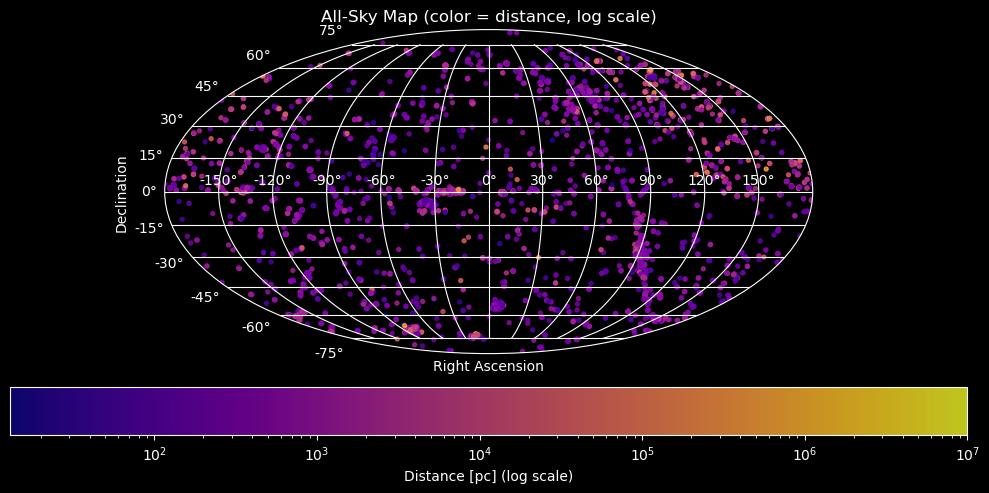

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

df = pd.read_csv("combined_vertical.csv")

ra = df["ra"].values
dec = df["dec"].values
dist = df["distance_pc"].values

# Rimuovi eventuali distanze nulle o negative (LogNorm non le accetta)
mask = dist > 0
ra = ra[mask]
dec = dec[mask]
dist = dist[mask]

# Convert to radians for Mollweide projection
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)

# Wrap RA at 180° and reverse direction (astronomy convention)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

# Plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(
    ra_rad,
    dec_rad,
    c=dist,
    s=8,
    cmap="plasma",
    norm=LogNorm(vmin=dist.min(), vmax=dist.max()),
    alpha=0.8
)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("All-Sky Map (color = distance, log scale)")
ax.grid(True)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=0.08)
cbar.set_label("Distance [pc] (log scale)")

plt.tight_layout()
plt.show()


In [65]:
import pandas as pd

# Dati come lista di liste
data = [
    [0, 0, 0, 0.113846],
    [0, 0, 1, 1.25261],
    [0, 0, 2, -3.03277],
    [0, 0, 3, -8.20129],
    [0, 0, 4, 0.884523],
    [0, 0, 5, -1.33804],
    [0, 0, 6, -1.17956],
    [0, 0, 7, -7.32709],
    [0, 0, 8, 1.48138],
    [0, 0, 9, 1.13886],
    [0, 0, 10, 0.66853],
    [0, 0, 11, 1.7076],
    [0, 0, 12, 3.90333],
    [0, 0, 13, 3.62599],
    [0, 0, 14, 6.31761],
    [0, 0, 15, 2.94989],
    [0, 0, 16, 12.7207],
    [0, 0, 17, -1.57449],
    [0, 0, 18, 17.3768],
    [0, 0, 19, 9.98056],
    [0, 0, 20, -3.34334],
    [0, 0, 21, 6.67547],
    [0, 0, 22, 15.043],
    [0, 0, 23, 11.7494],
    [0, 0, 24, 12.8716],
    [0, 0, 25, 26.1124],
    [0, 0, 26, 31.5761],
    [0, 0, 27, 18.49],
    [0, 0, 28, 12.9738],
    [0, 0, 29, 28.4091],
    [0, 0, 30, 13.7649],
    [0, 0, 31, 21.3222],
    [0, 0, 32, 28.8155],
    [0, 0, 33, 27.2537],
    [0, 0, 34, 20.71],
    [0, 0, 35, 19.5073],
    [0, 0, 36, 25.743],
    [0, 0, 37, 17.3959],
    [0, 0, 38, 20.1476],
    [0, 0, 39, 27.4991],
    [0, 0, 40, 19.1686],
    [0, 0, 41, 11.7251],
    [0, 0, 42, 17.056],
    [0, 0, 43, -3.07622],
    [0, 0, 44, 9.61503],
    [0, 0, 45, 10.3512],
    [0, 0, 46, -10.3012],
    [0, 0, 47, 7.43592],
    [0, 0, 48, 2.56774],
    [0, 0, 49, 5.20057],
    [0, 0, 50, 10.8599],
    [0, 0, 51, 4.77753],
    [0, 0, 52, 0.503658],
    [0, 0, 53, 1.14525],
    [0, 0, 54, -0.330923],
    [0, 0, 55, 5.45107],
    [0, 0, 56, 3.77936],
    [0, 0, 57, 9.43482],
    [0, 0, 58, 3.13904],
    [0, 0, 59, -3.6488],
    [0, 0, 60, 0.364348],
    [0, 0, 61, 8.27561],
    [0, 0, 62, -1.71891],
    [0, 0, 63, 4.0682]
]

# Crea il DataFrame
df_csv = pd.DataFrame(data, columns=["a", "b", "num", "intensità"])

# Salva come CSV
df_csv.to_csv("output.csv", index=False)

print("CSV creato con successo!")


CSV creato con successo!


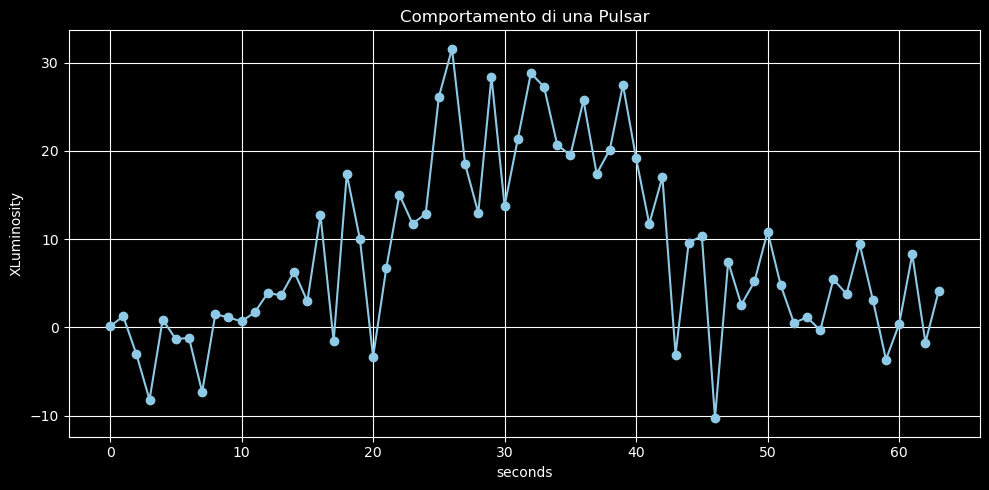

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il CSV
df = pd.read_csv("output.csv")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["num"], df["intensità"], marker='o', linestyle='-', color='#8ecae6')

plt.xlabel("seconds")
plt.ylabel("XLuminosity")
plt.title("Comportamento di una Pulsar")
plt.grid(True)
plt.tight_layout()
plt.show()
